In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
#x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
#y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
#coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
   # print(coordinate[0], coordinate[1])

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


dikson ru
chokurdakh ru
busselton au
dryden ca
ushuaia ar
mataura pf
komsomolskiy ru
arraial do cabo br
sambava mg
castro cl
albany au
buluang ph
novyy urengoy ru
provideniya ru
puerto ayora ec
tiksi ru
port hardy ca
yellowknife ca
port elizabeth za
tasiilaq gl
saskylakh ru
saint george bm
east london za
maracacume br
vaini to
lorengau pg
bereda so
pochutla mx
laguna br
ahipara nz
taolanaro mg
iqaluit ca
port macquarie au
galveston us
port alfred za
tuktoyaktuk ca
tautira pf
mahebourg mu
dikson ru
chapais ca
jamestown sh
kimbe pg
regenstauf de
hobart au
amderma ru
victoria sc
port lincoln au
taolanaro mg
timra se
leningradskiy ru
georgetown sh
rikitea pf
nikolskoye ru
alofi nu
ilulissat gl
ushuaia ar
rikitea pf
toliary mg
taolanaro mg
andenes no
nikolskoye ru
hilo us
port hardy ca
naze jp
namatanai pg
severo-kurilsk ru
cape town za
ust-maya ru
dumas us
airai pw
mantua cu
barrow us
poum nc
rio grande br
wukari ng
mataura pf
hofn is
tulsipur np
barentsburg sj
mataura pf
pilar ph
hambanto

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
print(len(cities))

629


In [9]:
import requests

import time

# Import the API key.
from config1 import wkey

url = "http://api.openweathermap.org/data/2.5/weather?"

from datetime import datetime


In [10]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "q=" + city.replace(" ","+") + "&units=imperial" + "&appid=" + wkey

    time.sleep(2)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | dikson
Processing Record 2 of Set 1 | chokurdakh
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | dryden
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | komsomolskiy
Processing Record 8 of Set 1 | arraial do cabo
Processing Record 9 of Set 1 | sambava
Processing Record 10 of Set 1 | castro
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | buluang
Processing Record 13 of Set 1 | novyy urengoy
Processing Record 14 of Set 1 | provideniya
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | port hardy
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | port elizabeth
Processing Record 20 of Set 1 | tasiilaq
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | saint george
Processing Record 23

In [17]:
city_data_df = pd.DataFrame(city_data)
city_data_df.tail(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
567,Eureka,40.8021,-124.1637,49.39,64,100,5.06,US,2021-10-17 07:58:36
568,Noumea,-22.2763,166.4572,76.98,86,44,6.38,NC,2021-10-17 07:59:48
569,Filadelfia,39.9523,-75.1638,54.32,84,0,1.01,US,2021-10-17 08:02:04
570,Deputatskiy,69.3000,139.9000,-10.82,100,92,2.73,RU,2021-10-17 08:04:52
571,Mount Hagen,-5.8581,144.2274,62.60,96,92,2.08,PG,2021-10-17 08:04:54
572,Nueve De Julio,-35.4444,-60.8831,49.71,60,35,7.90,AR,2021-10-17 08:04:56
573,Road Town,18.4167,-64.6167,80.20,77,34,4.63,VG,2021-10-17 08:04:59
574,Fiumicino,41.7675,12.2291,65.14,69,0,6.91,IT,2021-10-17 08:05:01
575,Auki,-8.7676,160.7034,77.90,86,26,4.23,SB,2021-10-17 08:05:06
576,Znamenskoye,57.1281,73.8282,46.69,73,100,5.46,RU,2021-10-17 08:05:08


In [18]:
new_column_order = ["City", "Country", "Date",'Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dikson,RU,2021-10-17 07:40:00,73.5069,80.5464,31.68,99,100,11.32
1,Chokurdakh,RU,2021-10-17 07:40:03,70.6333,147.9167,-6.88,100,94,2.57
2,Busselton,AU,2021-10-17 07:40:06,-33.6500,115.3333,66.04,65,74,11.25
3,Dryden,CA,2021-10-17 07:40:08,49.7833,-92.7503,41.29,75,1,8.05
4,Ushuaia,AR,2021-10-17 07:37:19,-54.8000,-68.3000,35.26,75,75,11.50
...,...,...,...,...,...,...,...,...,...
572,Nueve De Julio,AR,2021-10-17 08:04:56,-35.4444,-60.8831,49.71,60,35,7.90
573,Road Town,VG,2021-10-17 08:04:59,18.4167,-64.6167,80.20,77,34,4.63
574,Fiumicino,IT,2021-10-17 08:05:01,41.7675,12.2291,65.14,69,0,6.91
575,Auki,SB,2021-10-17 08:05:06,-8.7676,160.7034,77.90,86,26,4.23


In [21]:
# Create the output file (CSV).
output_data_file = "cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

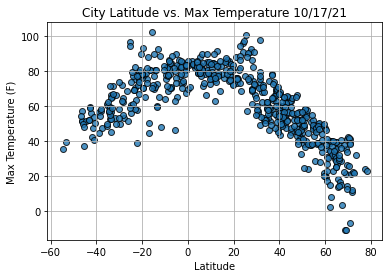

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("Figue1Weather")

# Show plot.
plt.show()

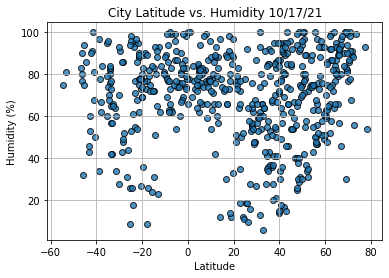

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Figure2Weather")
# Show plot.
plt.show()

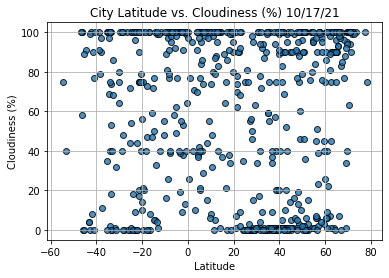

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Figure3Weather")
# Show plot.
plt.show()

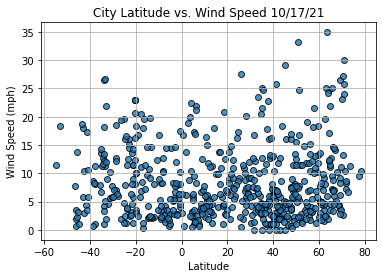

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("Figure4Weather")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
index13 = city_data_df.loc[13]

In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

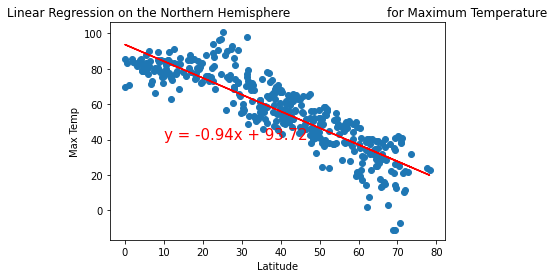

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

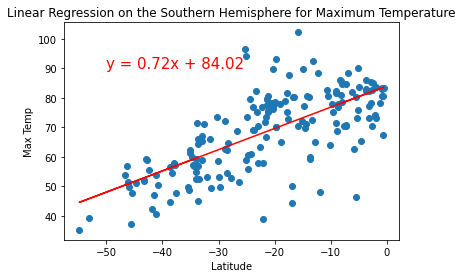

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

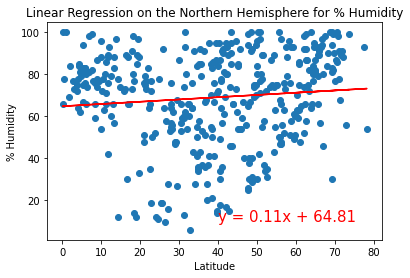

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

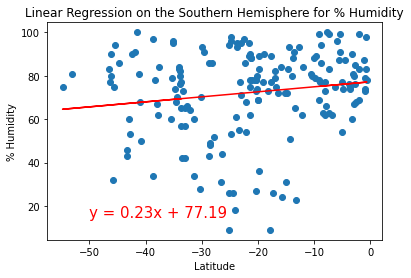

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

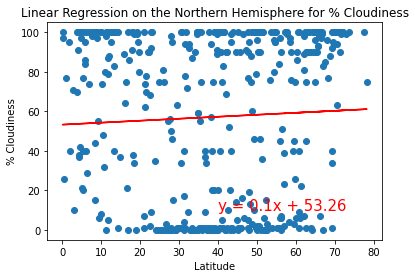

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(40,10))

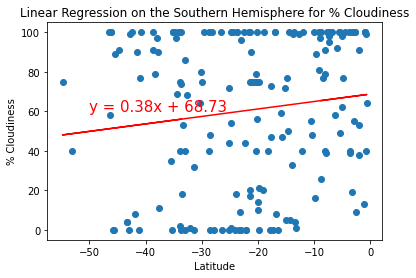

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

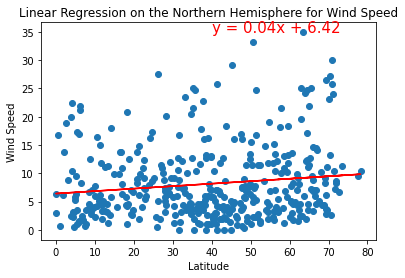

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

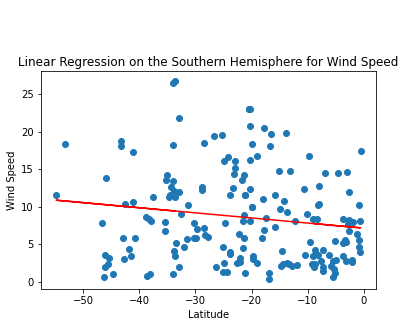

In [36]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))

In [ ]:
import gmaps